# [ACTION]
## Answer: Important Question / Guide:
- What are our data science questions?
- What are our objectives? 
- Sample questions?
- What do we want to know?

These answers will steer the analysis below

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import plotly.graph_objs as go # plotly graphical object
import chart_studio
chart_studio.tools.set_config_file(world_readable=False, sharing='private')
from string import ascii_letters
import warnings
warnings.filterwarnings('ignore')

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('tableau-colorblind10') #seaborn-whitegrid #tableau-colorblind10 #fivethirtyeight

textColor = '#006680' 
highlightColor = '#3b738f'
# plt.rcParams['text.color'] = '#006680'
# plt.rcParams['axes.labelcolor'] = '#006680'

# plt.rcParams['axes.titlesize'] = 25
# plt.rcParams['axes.labelsize'] = 20
# plt.rcParams['xtick.labelsize'] = 14
# plt.rcParams['ytick.labelsize'] = 14

### Data Source

- Data source: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv
- Data source: https://www.kaggle.com/tanuprabhu/population-by-country-2020

### Other References:
- https://www.kaggle.com/sabihaif/world-happiness-report-analysis
- https://www.kaggle.com/saviola07/world-happiness-report-analysis
- https://www.kaggle.com/koki25ando/data-analysis-of-world-happiness-report

In [3]:
# Save a copy in your general path - C:\Users\ACER\

csv_file_list = ["2015.csv", "2016.csv", "2017.csv", "2018.csv", "2019.csv"]

list_of_dataframes = []
for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename, index_col=None))

time_series = pd.concat(list_of_dataframes)

time_series.shape

(782, 13)

In [4]:
time_series['Year'] = time_series['Year'].astype(object)

time_series.dtypes

Year                              object
Country                           object
Continent                         object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
Social Support                   float64
dtype: object

In [5]:
time_series.rename(columns = {'Happiness Rank' : 'Happiness_Rank',
                           'Happiness Score' : 'Happiness_Score',
                           'Standard Error' : 'Standard_Error',
                           'Economy (GDP per Capita)' : 'Economy',
                           'Health (Life Expectancy)' : 'Health',
                          'Trust (Government Corruption)' : 'Trust',
                          'Dystopia Residual' : 'Dystopia_Residual',
                             'Social Support': 'Social_Support'}, inplace = True)

In [6]:
time_series.isna().sum()

Year                   0
Country                0
Continent              0
Happiness_Rank         0
Happiness_Score        0
Economy                0
Family               312
Health                 0
Freedom                0
Trust                  1
Generosity             0
Dystopia_Residual    312
Social_Support       470
dtype: int64

In [7]:
time_series = time_series[['Year','Country','Continent', 'Happiness_Score']]
time_series

# Add ISO code columns for each country for chloropleth map ??

Year                   Country Continent  Happiness_Score
0    2015                     Libya    Africa            5.754
1    2015                   Algeria    Africa            5.605
2    2015                 Mauritius    Africa            5.477
3    2015                   Nigeria    Africa            5.268
4    2015                    Zambia    Africa            5.129
..    ...                       ...       ...              ...
151  2019                    Rwanda    Africa            3.334
152  2019                  Tanzania    Africa            3.231
153  2019               Afghanistan      Asia            3.203
154  2019  Central African Republic    Africa            3.083
155  2019               South Sudan    Africa            2.853

[782 rows x 4 columns]

# World Happiness in the last 5 years

In [8]:
# Chloropleth map - shade depends on score
# 2019 will do but better if interactive 2015 - 2019 hehe

In [9]:
# Get mean score of each continent per year - graph in one line plot

# x- axis: years
# y - mean happiness score
# 7 lines because 7 continents in one plot

# Let's explore 2019 data

In [10]:
# Load 2019 deep dive data 
df = pd.read_csv(r'C:\Users\ACER\Desktop\DLSU\dlsu datasci proj\2019.csv')
df['Year'] = df['Year'].astype(object)
df.rename(columns = {'Happiness Rank' : 'Happiness_Rank',
                           'Happiness Score' : 'Happiness_Score',
                           'Standard Error' : 'Standard_Error',
                           'Economy (GDP per Capita)' : 'Economy',
                           'Health (Life Expectancy)' : 'Health',
                          'Trust (Government Corruption)' : 'Government Trust',
                          'Dystopia Residual' : 'Dystopia_Residual',
                             'Social Support': 'Social_Support'}, inplace = True)
df.head()

Year      Country Continent  Happiness_Rank  Happiness_Score  Economy  \
0  2019      Finland    Europe               1            7.769    1.340   
1  2019      Denmark    Europe               2            7.600    1.383   
2  2019       Norway    Europe               3            7.554    1.488   
3  2019      Iceland    Europe               4            7.494    1.380   
4  2019  Netherlands    Europe               5            7.488    1.396   

   Social_Support  Health  Freedom  Generosity  Government Trust  
0           1.587   0.986    0.596       0.153             0.393  
1           1.573   0.996    0.592       0.252             0.410  
2           1.582   1.028    0.603       0.271             0.341  
3           1.624   1.026    0.591       0.354             0.118  
4           1.522   0.999    0.557       0.322             0.298

In [11]:
df.describe()

Happiness_Rank  Happiness_Score     Economy  Social_Support  \
count      156.000000       156.000000  156.000000      156.000000   
mean        78.500000         5.407096    0.905147        1.208814   
std         45.177428         1.113120    0.398389        0.299191   
min          1.000000         2.853000    0.000000        0.000000   
25%         39.750000         4.544500    0.602750        1.055750   
50%         78.500000         5.379500    0.960000        1.271500   
75%        117.250000         6.184500    1.232500        1.452500   
max        156.000000         7.769000    1.684000        1.624000   

           Health     Freedom  Generosity  Government Trust  
count  156.000000  156.000000  156.000000        156.000000  
mean     0.725244    0.392571    0.184846          0.110603  
std      0.242124    0.143289    0.095254          0.094538  
min      0.000000    0.000000    0.000000          0.000000  
25%      0.547750    0.308000    0.108750          0.047000  
50%      0.789000    0.417000    0.177500          0.085500  
75%      0.881750    0.507250    0.248250          0.141250  
max      1.141000    0.631000    0.566000          0.453000

In [12]:
df.isna().sum()

Year                0
Country             0
Continent           0
Happiness_Rank      0
Happiness_Score     0
Economy             0
Social_Support      0
Health              0
Freedom             0
Generosity          0
Government Trust    0
dtype: int64

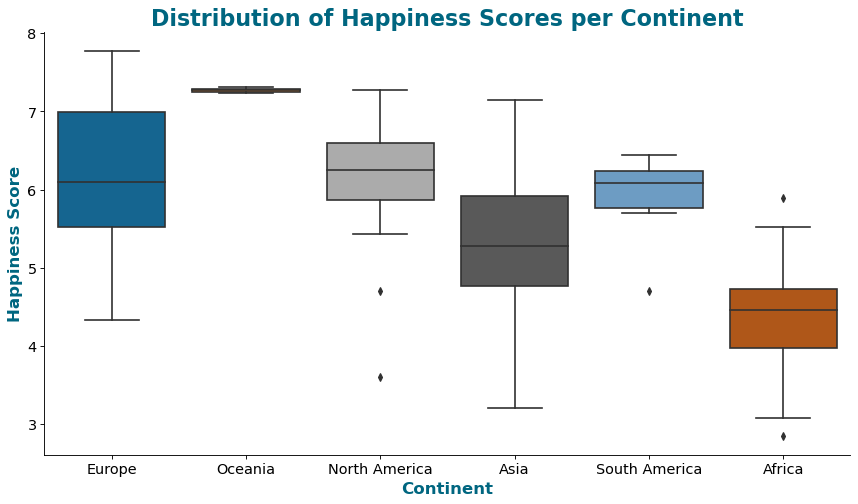

In [13]:
# Create a boxplot
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

sns.boxplot(data=df, x=df['Continent'], y=df['Happiness_Score'])

ax.set_title('Distribution of Happiness Scores per Continent', color='#006680', fontweight='bold', fontsize=20,)
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold');
ax.set_xlabel('Continent', color='#006680', fontsize=15, fontweight='bold');

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(fontsize=13, rotation=0)
plt.yticks(fontsize=13, rotation=0)


plt.show()

In [14]:
data = [dict(
        type='choropleth',
        colorscale = 'Darkmint', #algae #darkmint
        locations = df['Country'],
        z = df['Happiness_Score'],
        locationmode = 'country names',
        text = df['Country'],
        colorbar = dict(
        title = 'Happiness Score', 
        titlefont=dict(size=15),
        tickfont=dict(size=20))
)]
layout = dict(
    title = 'Happiness Score',
    titlefont = dict(size=20),
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(type = 'equirectangular')
        )
)
choromap = go.Figure(data = data, layout = layout)
choromap

## Take a closer look - how each factor affects overall happiness or one another

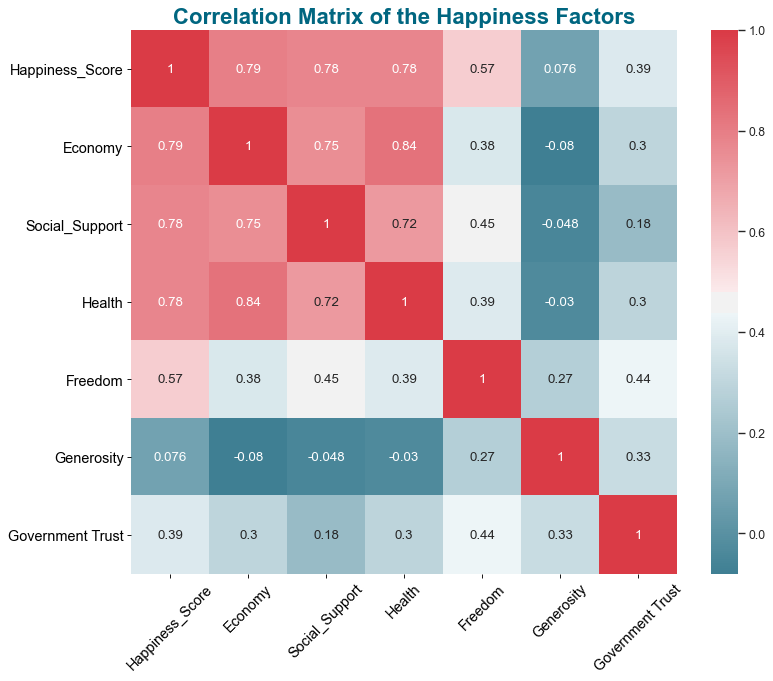

In [15]:
df3 = df.drop(['Happiness_Rank', 'Year'], 1) #drop as rank and score are dependent variables

fig_dims = (11, 9)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)
cmap = sns.diverging_palette(220, 10, as_cmap=True) #set the plot structure

sns.set(style="white")
sns.heatmap(df3.corr(), annot=True, cmap=cmap)

ax.set_title('Correlation Matrix of the Happiness Factors', color='#006680', fontweight='bold', fontsize=20,)
plt.yticks(fontsize=13, rotation=0)
plt.xticks(fontsize=13, rotation=45)
plt.show()

No handles with labels found to put in legend.


<Figure size 800x640 with 0 Axes>

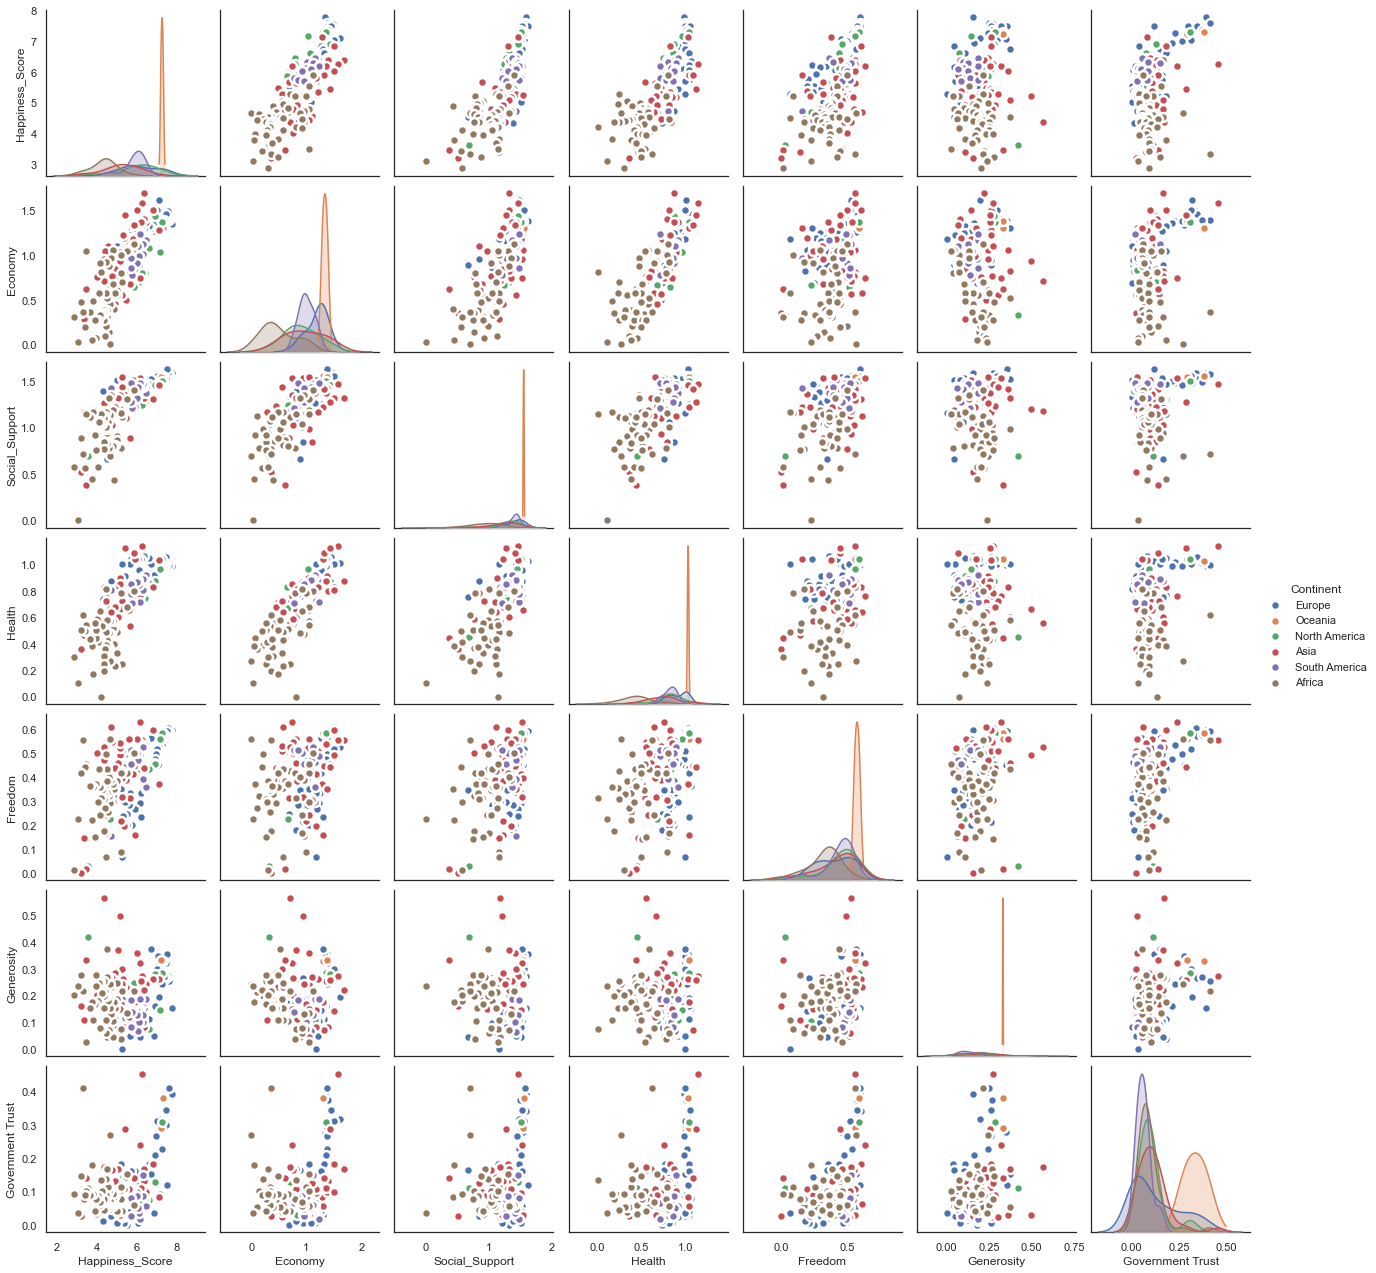

In [16]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df3, kind="scatter", hue="Continent", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5, cmap=cmap))
ax.legend(fontsize=14);
plt.show()

## Does a better economy also mean a happier country?

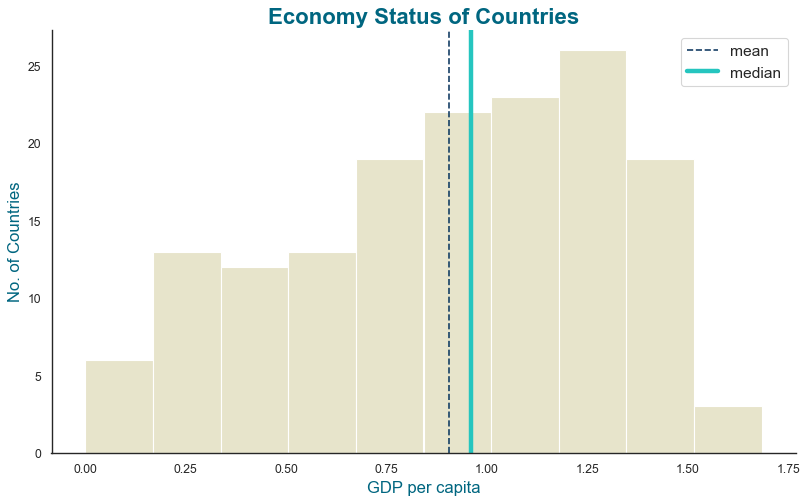

In [17]:
# Add actual mean and median values in the box!!!

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

ax = df['Economy'].hist(edgecolor='w', figsize=(12, 7), color='#E7E4CB')

ax.set_title('Economy Status of Countries', color='#006680', fontsize=20, fontweight='bold')
ax.set_xlabel('GDP per capita', color='#006680', fontsize=15)
ax.set_ylabel('No. of Countries', color='#006680', fontsize=15);

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)

ax.axvline(x=df['Economy'].mean(), color='#164066', linestyle='--', label='mean')
ax.axvline(x=df['Economy'].median(), color='#25C5BF', linewidth=4, label='median')
ax.legend(fontsize=14);

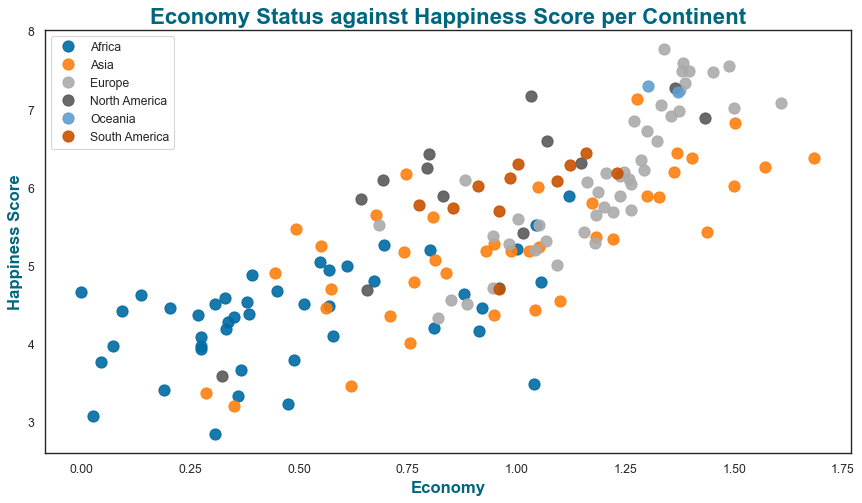

In [23]:
# Just diff colors below

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

plt.style.use('tableau-colorblind10')
groups = df.groupby("Continent")
for name, group in groups:
    plt.plot(group["Economy"], group["Happiness_Score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Economy', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Economy Status against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

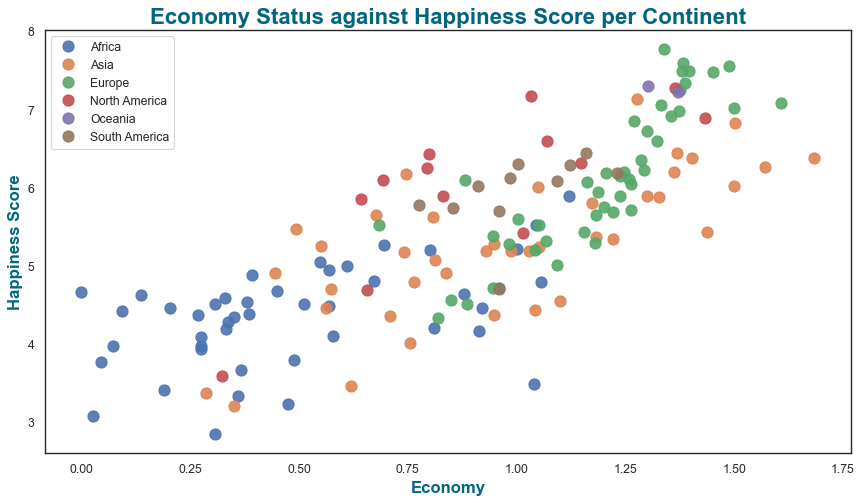

In [19]:
# Just diff colors below

sns.set(style="white")

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims,  dpi=80)

groups = df.groupby("Continent")
for name, group in groups:
    plt.plot(group["Economy"], group["Happiness_Score"], marker="o", linestyle='', label=name, ms=10, alpha=0.9)
    
ax.set_xlabel('Economy', color='#006680', fontsize=15, fontweight='bold')
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold')
ax.set_title('Economy Status against Happiness Score per Continent', color='#006680', fontweight='bold', fontsize=20);

plt.legend();

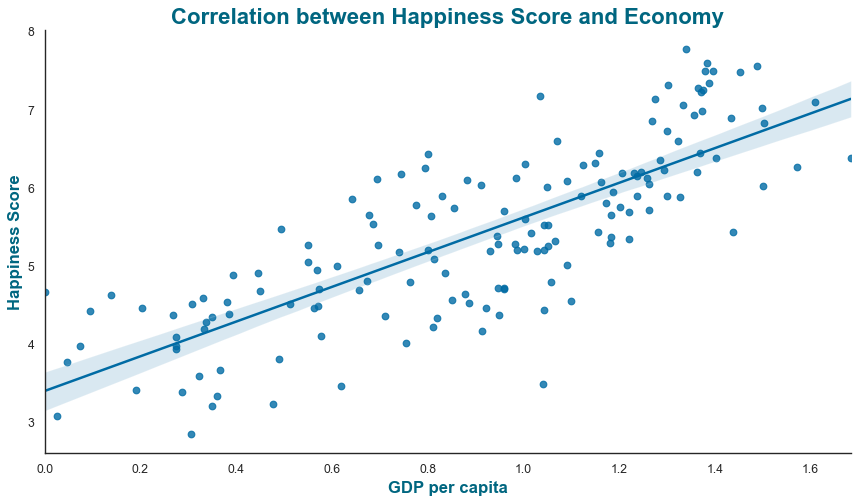

In [20]:
plt.style.use('tableau-colorblind10')
fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='Economy',y='Happiness_Score', data=df)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Happiness Score and Economy', color='#006680', fontweight='bold', fontsize=20)
ax.set_ylabel('Happiness Score', color='#006680', fontsize=15, fontweight='bold');
ax.set_xlabel('GDP per capita', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.grid(False)

## Social Support from the Government and Healthy Life Expectancy
Strong healthcare and security system provided by the government?

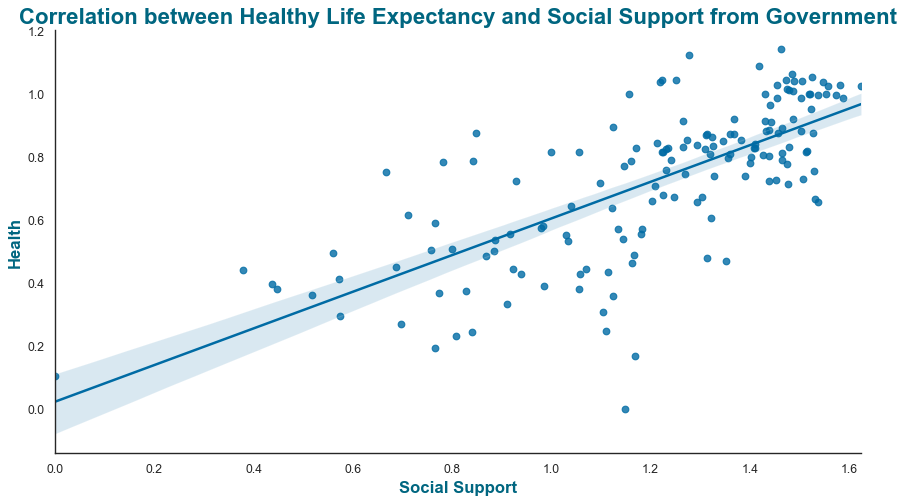

In [21]:
plt.style.use('tableau-colorblind10')

fig_dims = (13, 7)
fig, ax = plt.subplots(figsize=fig_dims, dpi=80)

sns.regplot(x='Social_Support',y='Health', data=df)
sns.set(style="white")
plt.xticks(rotation=90)

ax.set_title('Correlation between Healthy Life Expectancy and Social Support from Government', color='#006680', fontweight='bold', fontsize=20)
ax.set_xlabel('Social Support', color='#006680', fontsize=15, fontweight='bold');
ax.set_ylabel('Health', color='#006680', fontsize=15, fontweight='bold');
plt.xticks(rotation=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)